In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

In [2]:
df = pd.read_csv(r"E:\GUVI\Project 4\kidney_disease - kidney_disease.csv") 

In [3]:
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.info())
print(df.describe(include='all'))
print("Missing values:\n", df.isnull().sum())

Shape: (400, 26)
Columns: Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc     

In [4]:
for col in ['pcv', 'wc', 'rc']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
df.drop(columns=['id'], inplace=True)

In [6]:
binary_map = {'yes': 1, 'no': 0, 'normal': 1, 'abnormal': 0,
              'present': 1, 'notpresent': 0, 'good': 1, 'poor': 0}
for col in ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']:
    df[col] = df[col].map(binary_map)


In [7]:
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

In [8]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

In [9]:
print("Remaining missing:\n", df.isnull().sum())

Remaining missing:
 age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [11]:
scaler = StandardScaler()
X = df.drop('classification', axis=1)
y = df['classification']

X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [16]:
print("\nLogistic Regression Report:")
print(classification_report(y_test, lr_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

print("\nRandom Forest Report:")
print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

ROC-AUC: 1.0

Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

ROC-AUC: 1.0


In [ ]:
print("Class balance:")
print(df['classification'].value_counts())

print("\n Percentage distribution:")
print(df['classification'].value_counts(normalize=True) * 100)

print("\n Check duplicates:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

✅ Class balance:
classification
1    250
0    150
Name: count, dtype: int64

✅ Percentage distribution:
classification
1    62.5
0    37.5
Name: proportion, dtype: float64

✅ Check duplicates:
Number of duplicate rows: 0


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [23]:
rf = RandomForestClassifier(random_state=42)

In [24]:
scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy')

In [ ]:


print("Cross-validation accuracy scores:", scores)
print(f"Mean accuracy: {scores.mean():.4f}")
print(f"Standard deviation: {scores.std():.4f}")

✅ Cross-validation accuracy scores: [0.9875 1.     0.9625 0.9875 1.    ]
Mean accuracy: 0.9875
Standard deviation: 0.0137


In [26]:
import matplotlib.pyplot as plt

In [27]:
rf.fit(X_scaled, y)

RandomForestClassifier(random_state=42)

In [28]:
importances = rf.feature_importances_
feature_names = X.columns

In [29]:
sorted_idx = importances.argsort()[::-1]

In [30]:
print("\n Feature importance:")
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")


 Feature importance:
sc: 0.1643
pcv: 0.1623
hemo: 0.1515
sg: 0.1036
rc: 0.1032
al: 0.0717
dm: 0.0496
htn: 0.0385
sod: 0.0343
bgr: 0.0318
bu: 0.0244
age: 0.0137
bp: 0.0111
pot: 0.0075
appet: 0.0067
pc: 0.0063
su: 0.0061
pe: 0.0047
wc: 0.0037
rbc: 0.0027
ba: 0.0014
ane: 0.0009
pcc: 0.0001
cad: 0.0000


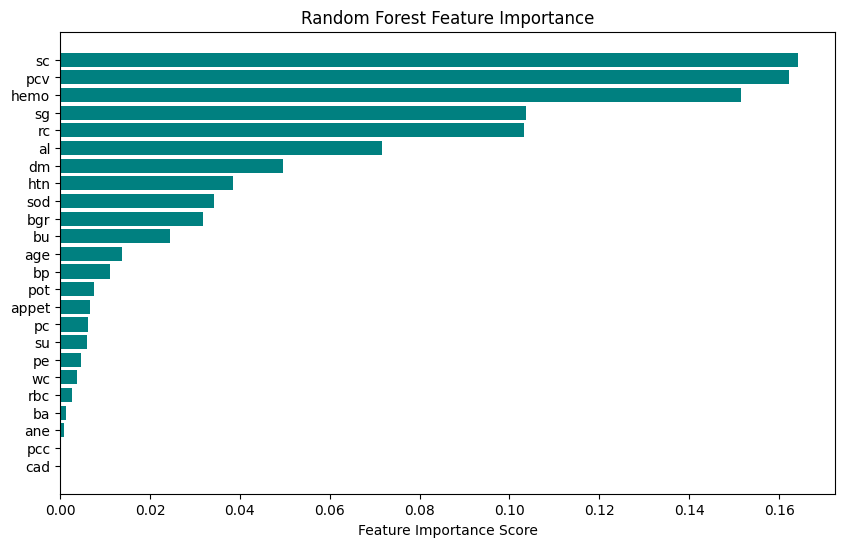

In [31]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], color='teal')
plt.xlabel("Feature Importance Score")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [32]:
joblib.dump(rf, r'E:\GUVI\Project 4\kidney_rf_model.pkl')
joblib.dump(scaler, r'C:\Users\Bala viknese\PycharmProjects\Pythonproject4\kidney_scaler.pkl')

print("\n Pipeline complete! Model & scaler saved.")


 Pipeline complete! Model & scaler saved.
